# **Project Name** - Predicting Bike-Sharing Demand


##### **Team Members  - S Hari Krishna and Sarath Prakash**

### Import Libraries


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import shap 
import graphviz

import pickle

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

### Dataset Loading


In [2]:
# Load Dataset
dataset = pd.read_csv("SeoulBikeData.csv", encoding="latin")

### Dataset First View


In [3]:
# Dataset First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count


In [8]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information


In [9]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values


In [10]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]

0

#### Missing Values/Null Values


In [11]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

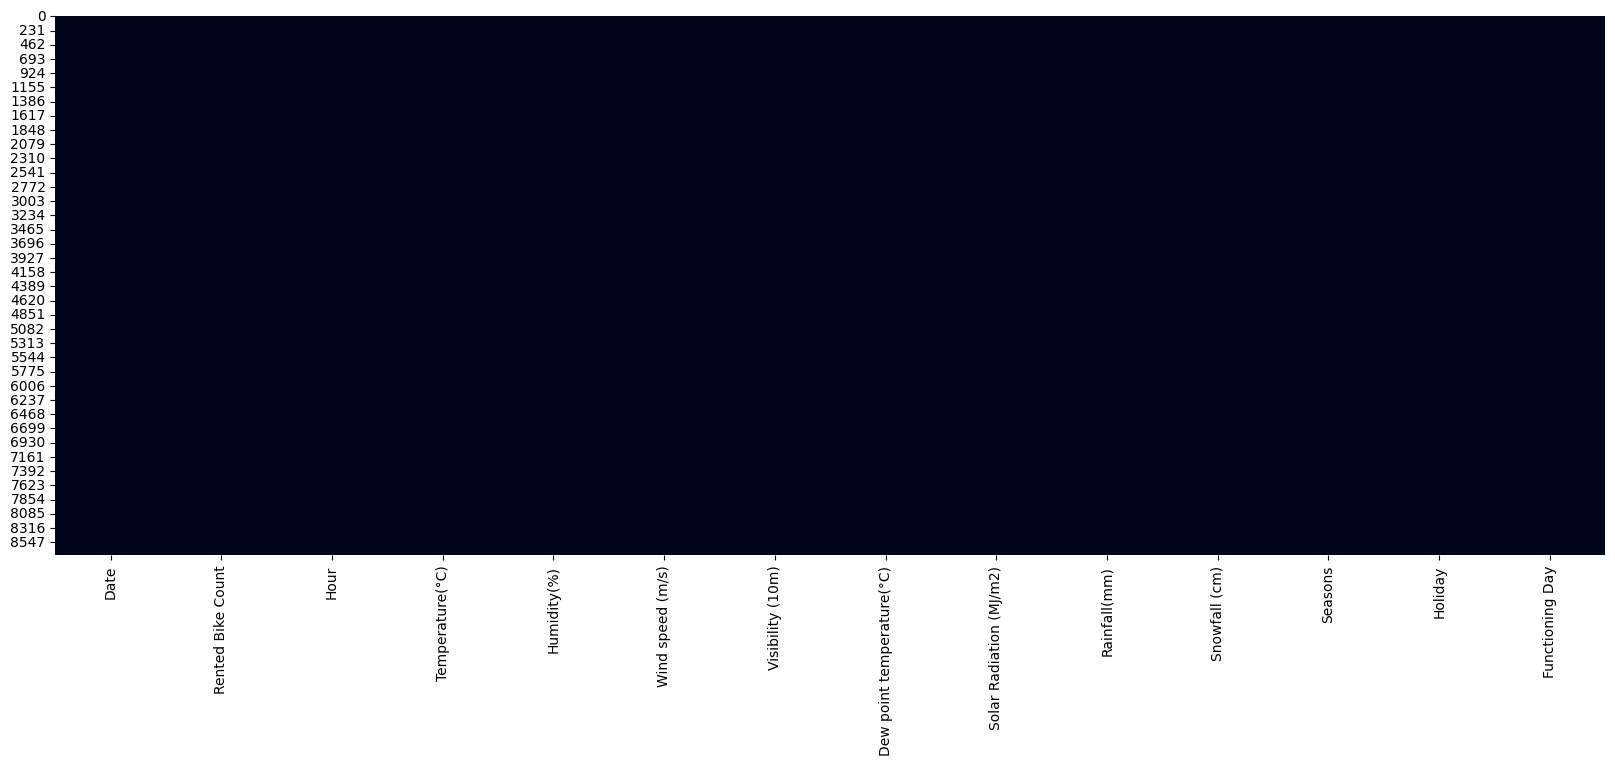

In [12]:
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?


The Seoul Bike Sharing Demand dataset contains information about bike rental in Seoul from 2017-2018. It includes hourly observations of 14 columns, such as the date, time, number of rented bikes, weather conditions, and other factors that may influence bike rental demand.

This dataset contains more than 8000 rows and 14 columns of the data.


## **_2. Understanding Your Variables_**


In [13]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
# Dataset Describe
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description


- **Date**: The date of the observation.
- **Rented Bike Count**: The number of bikes rented during the observation period.
- **Hour**: The hour of the day when the observation was taken.
- **Temperature(°C)**: The temperature in Celsius at the time of observation.
- **Humidity(%)**: The percentage of humidity at the time of observation.
- **Wind speed (m/s)**: The wind speed in meters per second at the time of observation.
- **Visibility (10m)**: The visibility in meters at the time of observation.
- **Dew point temperature(°C)**: The dew point temperature in Celsius at the time of observation.
- **Solar Radiation (MJ/m2)**: The amount of solar radiation in mega-joules per square meter at the time of observation.
- **Rainfall(mm)**: The amount of rainfall in millimeters during the observation period.
- **Snowfall(cm)**: The amount of snowfall in centimeters during the observation period.
- **Seasons**: The season of the year when the observation was taken.
- **Holiday**: Whether the observation was taken on a holiday or not.
- **Functioning Day**: Whether the bike sharing system was operating normally or not during the observation period.


### Check Unique Values for each variable.


In [15]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


## 3. **_Data Wrangling_**


### Data Wrangling Code


In [80]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()
df.shape

(8760, 14)

In [81]:
# Changing the "Date" column dtype to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [82]:
# Creating new columns Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.day_name()  # we better understand names (monday, friday etc) instead of numbers

In [83]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday


In [84]:
# Unique hours 
df['Hour'].unique()    # It is in 24hrs format

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [85]:
# Year wise Rented Bike Count
df.groupby('Year')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2017,744.0,249.099462,158.396544,3.0,131.75,236.5,329.0,937.0
2018,8016.0,746.879242,656.708588,0.0,206.00,586.0,1117.0,3556.0


In [86]:
# weekday wise Rented Bike Count
df.groupby('weekday')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
Friday,1272.0,747.117925,658.396481,0.0,233.00,566.0,1115.25,3365.0
Monday,1248.0,730.563301,664.960809,2.0,186.00,533.0,1099.00,3380.0
Saturday,1248.0,709.528846,603.913165,0.0,219.00,519.0,1076.00,2497.0
Sunday,1248.0,625.155449,605.529274,0.0,158.75,406.0,936.50,2514.0
Thursday,1248.0,690.704327,641.675659,0.0,185.00,495.0,1049.00,3418.0
Tuesday,1248.0,687.977564,652.165697,0.0,179.50,485.5,1031.50,3556.0
Wednesday,1248.0,740.349359,677.573675,0.0,206.75,536.5,1107.25,3384.0


In [87]:
# Season wise Rented Bike Count
df.groupby('Seasons')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Seasons,,,,,,,,
Autumn,2184.0,819.597985,651.085621,0.0,241.75,763.5,1197.50,3298.0
Spring,2208.0,730.031250,621.509635,0.0,206.00,583.0,1105.25,3251.0
Summer,2208.0,1034.073370,690.244759,9.0,526.75,905.5,1442.50,3556.0
Winter,2160.0,225.541204,150.372236,3.0,110.00,203.0,305.00,937.0


In [88]:
# Holiday wise Rented Bike Count
df.groupby('Holiday')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Holiday,,,,,,,,
Holiday,432.0,499.756944,570.772769,0.0,105.75,240.0,762.5,2400.0
No Holiday,8328.0,715.228026,646.879124,0.0,200.00,524.5,1073.0,3556.0


In [89]:
# Changing Hour, Year, Month dtypes to categorical
for col in ['Year', 'Month', 'Day']:
  df[col] = df[col].astype('category')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [91]:
# Statistical properties of Rented Bike Count
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [92]:
# Functioning Day wise Rented Bike Count
df.groupby('Functioning Day')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Functioning Day,,,,,,,,
No,295.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Yes,8465.0,729.156999,642.351166,2.0,214.0,542.0,1084.0,3556.0


In [93]:
# Creating Temperature bin of 1°C intervals that will help in visualizations
df['Temperature Bin'] = df['Temperature(°C)'].round(0).astype('int64')

### What all manipulations have you done and insights you found?


First of all I checked for duplicate data and missing values, found 0 in both cases. Changed datatype of **Date** column which represent the date of observing the data to datetime to better access the data functions provided by pandas. I created new features like **Day**, **Month**, **Year**, **weekday** from Date column that will help better in visualizations as well as modelling as it can help getting insight any trend over day or month or weekday etc. I found out that dataset contains information from Dec 2017 to Nov 2018, so we don't have enough data to find patterns/trends over years. Converted Year, Month, Day to categorical data type. Created new feature **Temperature bin** which will help mainly in visualizing the trend of demand over temperatures.

Although visualization is better to get insight of the data that will be done in next section, I tried to understand bike rentals demand levels accross seasons (summer has highest demand and winter has lowest), Holiday has less demand compared to non holiday maybe because there are more people who use rented bikes to go to offices, schools etc on non holiday. As expected non functioning day has zero demand. We may need to drop all the rows with non functioning day as we'll be trying to predict demand when the rental bike service is functioning.


## **_4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables_**


#### Chart - 1 - Histogram & Box-plot for distribution of Rented Bike Count


Text(0.5, 1.0, 'Rented Bike Count Box Plot')

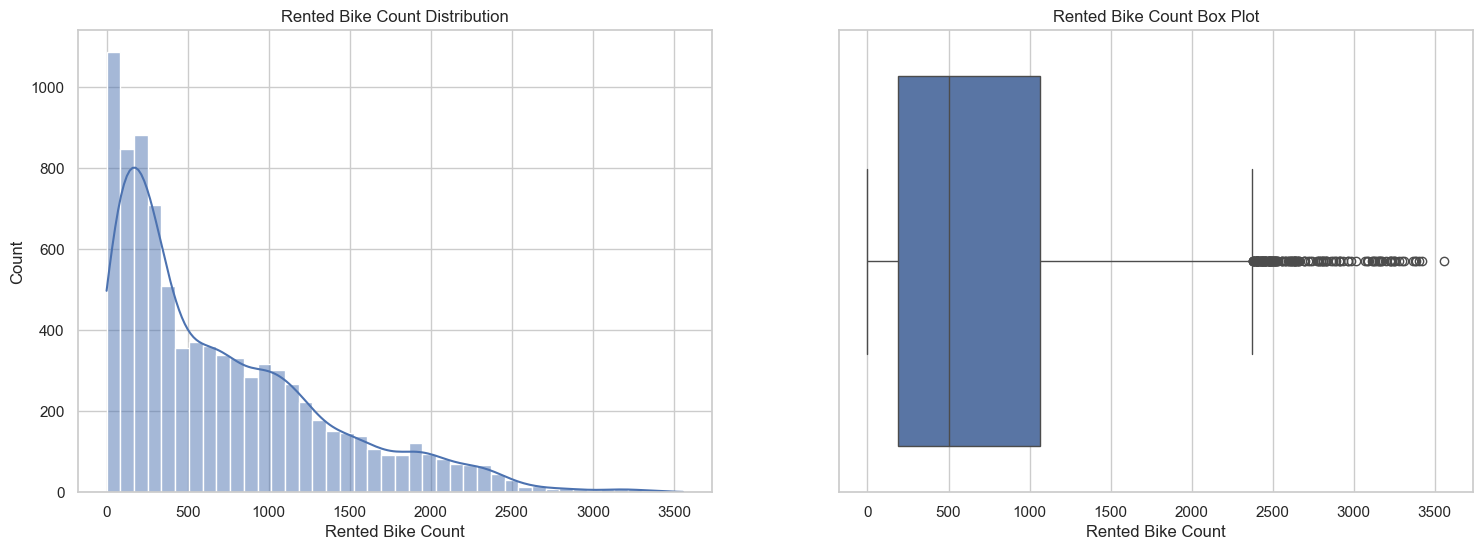

In [94]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(x='Rented Bike Count', data=df, kde=True)
plt.title("Rented Bike Count Distribution")

plt.subplot(1,2,2)
sns.boxplot(x='Rented Bike Count', data = df)
plt.title("Rented Bike Count Box Plot")

##### 1. Why did you pick the specific chart?


The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the distributions of Rented Bike Count.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.


##### 2. What is/are the insight(s) found from the chart?


Rented Bike Count is right skewed. It means that most of the data falls on the lower end of the scale, and there are relatively fewer instances where a large number of bikes were rented.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, this insights can help create a positive business impact in multiple ways. By understanding the factors that impact the demand for bike sharing services, the company can make better-informed decisions on where to allocate their resources. For example, companies may choose to invest in improving their services during peak demand periods or offer promotions during slower periods to encourage more bike rentals.


#### Chart - 2 - Rented Bike Count by Seasons


Text(0.5, 1.0, 'Rented Bike Count by Seasons')

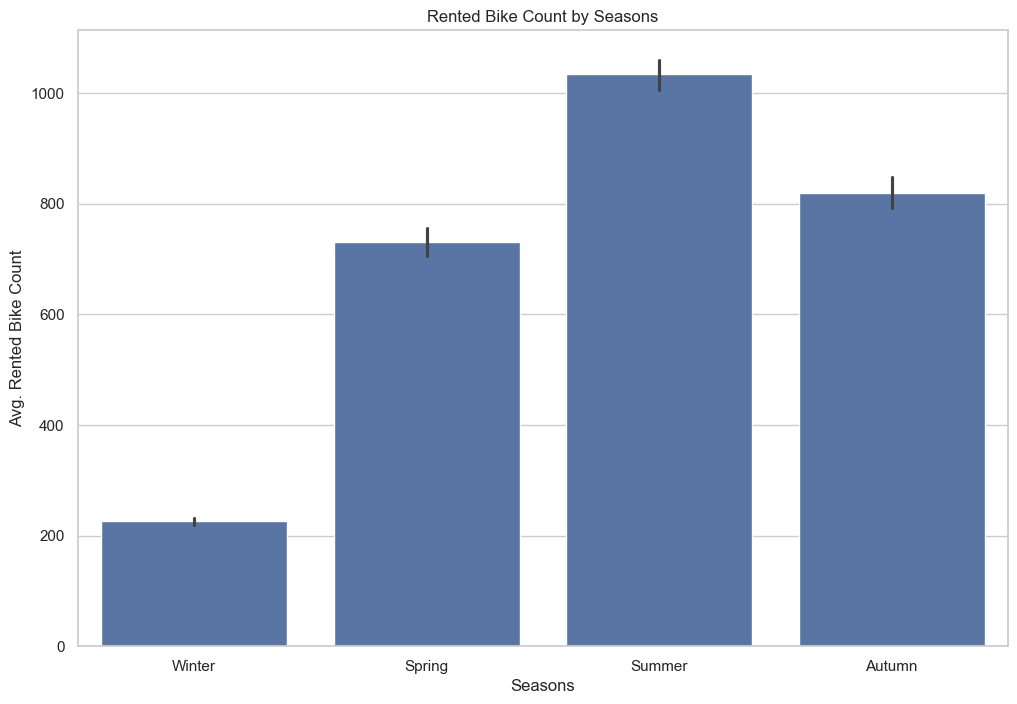

In [95]:
plt.figure(figsize = (12,8))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df)
plt.xlabel("Seasons")
plt.ylabel("Avg. Rented Bike Count")
plt.title("Rented Bike Count by Seasons")

##### 1. Why did you pick the specific chart?


Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the avg rented bike demandover different seasons, I have used Bar Chart.


##### 2. What is/are the insight(s) found from the chart?


Rentals Bike demand is highest in summer season and lowest in winter season.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


This finding can help the bike sharing company plan its operations more effectively by increasing the number of bikes available during the peak season and reducing them during the off-season. The company can also consider offering seasonal promotions to encourage more rentals during the off-season.


#### Chart - 3 - Rented Bike Count trend by Hour


Text(0.5, 1.0, 'Rented Bike Count trend by Hour')

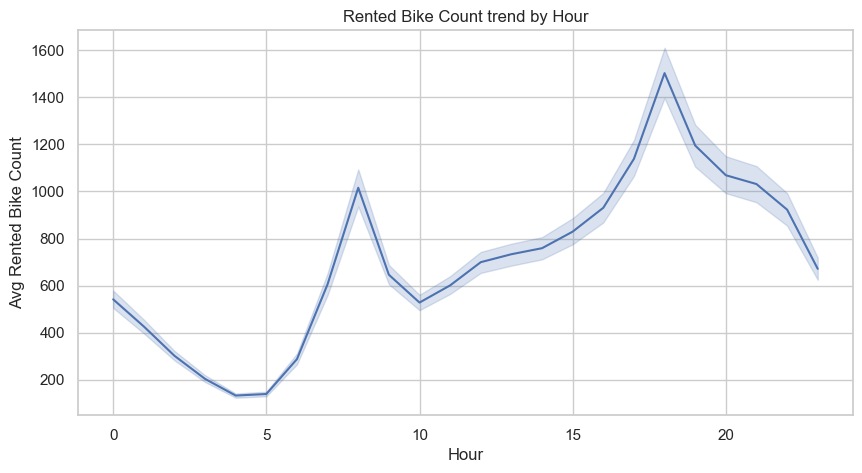

In [96]:
# Average Rented Bike Count by Hour
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Rented Bike Count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Rented Bike Count trend by Hour")

##### 1. Why did you pick the specific chart?


Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.

Thus, I have used the line chart to show the average rented bike count over different hours of a day.


##### 2. What is/are the insight(s) found from the chart?


The demand is higher during rush hour (i.e., 7-9AM and 5-7PM) when people go to offices/schools and come back in evening.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, by understanding the demand trend over the hours of the day, the company can allocate its resources more effectively. For example, they may choose to increase the number of bikes available during the rush hours to meet the demand. Additionally, they may choose to offer promotions or discounts during off-peak hours to encourage more rentals.


#### Chart - 4 - Avg. Rented Bike Count by Months


Text(0.5, 1.0, 'Rented Bike Count by Months')

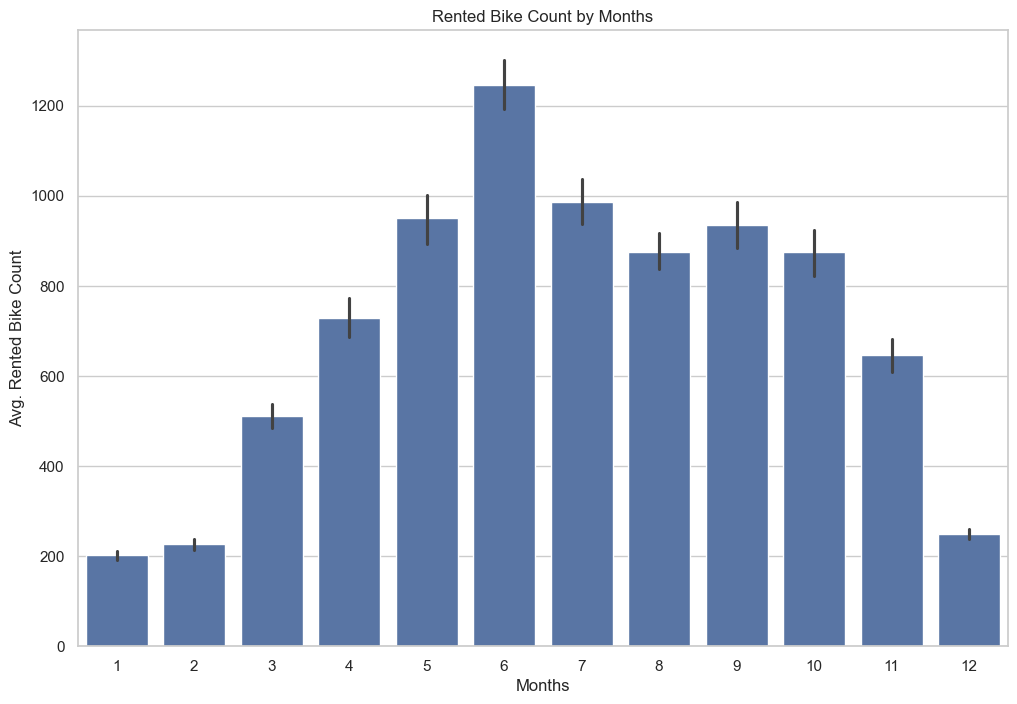

In [97]:
plt.figure(figsize = (12,8))
sns.barplot(x='Month', y='Rented Bike Count', data=df)
plt.xlabel("Months")
plt.ylabel("Avg. Rented Bike Count")
plt.title("Rented Bike Count by Months")

##### 1. Why did you pick the specific chart?


Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the avg rented bike demandover different months, I have used Bar Chart.


##### 2. What is/are the insight(s) found from the chart?


Rentals Bike demand is more in summer months like May, June, Jult etc compared to winter months like December, January, February etc.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, by understanding the demand trend over different months, the company can optimize its operations, resources, pricing to meet the demand and maximize revenue. For example, during peak months (May, June, July), the company can increase the number of bikes available and adjust pricing strategies to maximize revenue. Additionally, during the low-demand months (Dec, Jan, Feb), the company can reduce the number of bikes available and offer promotions or discounts to attract customers.


#### Chart - 5 - Average Rented Bike Count by Temperature(°C)


Text(0.5, 1.0, 'Rented Bike Count trend by Temperature(°C)')

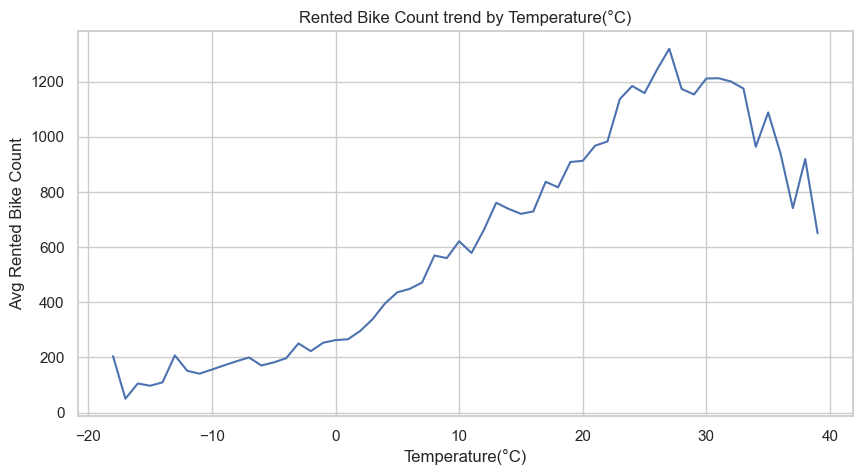

In [98]:
plt.figure(figsize=(10,5))
df.groupby('Temperature Bin')['Rented Bike Count'].mean().plot(kind='line')
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Temperature(°C)")
plt.title("Rented Bike Count trend by Temperature(°C)")

##### 1. Why did you pick the specific chart?


Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over temperatures).


##### 2. What is/are the insight(s) found from the chart?


The Rentals Bike demand increases as tempreature increases although too high temperature like above 30°C leads to decrease in demand.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, by understanding the demand trend over temperature, the company can allocate its resources more effectively.

For example, during periods of high temperatures, the company can adjust the number of bikes available to meet the increased demand. Additionally, they may choose to offer promotions or discounts during periods of lower temperatures to encourage more rentals.

Moreover, by understanding that demand tends to decrease above 30°C, the company can adjust its operations accordingly, such as reducing the number of bikes available during those periods and focusing more on marketing efforts to attract customers during cooler periods.


#### Chart - 6 - Average Rented Bike Count by Dew point temperature(°C)


Text(0.5, 1.0, 'Rented Bike Count trend by Dew point temperature(°C)')

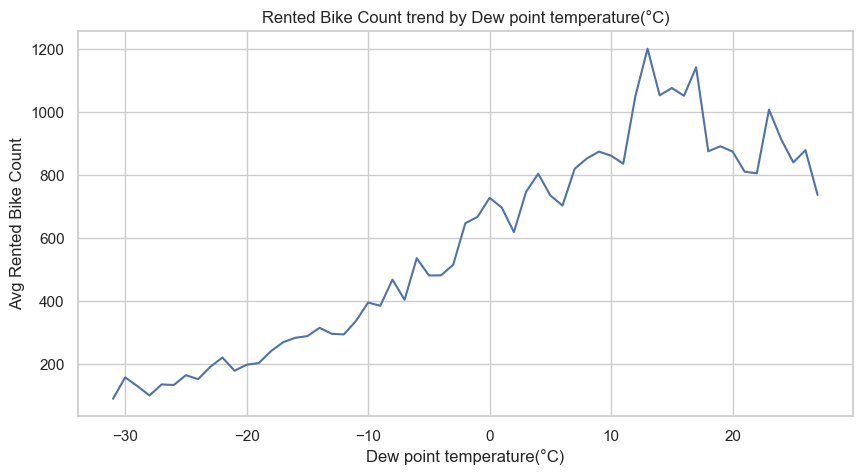

In [99]:
d = df.copy()
d['Dew point temperature(°C) Bin'] = d['Dew point temperature(°C)'].round(0).astype('int64')

plt.figure(figsize=(10,5))
d.groupby('Dew point temperature(°C) Bin')['Rented Bike Count'].mean().plot(kind='line')
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Dew point temperature(°C)")
plt.title("Rented Bike Count trend by Dew point temperature(°C)")

##### 1. Why did you pick the specific chart?


Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over dew point temperatures).


##### 2. What is/are the insight(s) found from the chart?


Similar to trend of bike rentals demand over temperature, here also demand increases as dew point tempreature increases although too high dew pint temperature like above 18°C leads to decrease in demand


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, it will help creating positive business impact in same way as temperature do.


#### Chart - 7 - Rented Bike Count by Functioning Day


Text(0, 0.5, 'Rented Bike Count')

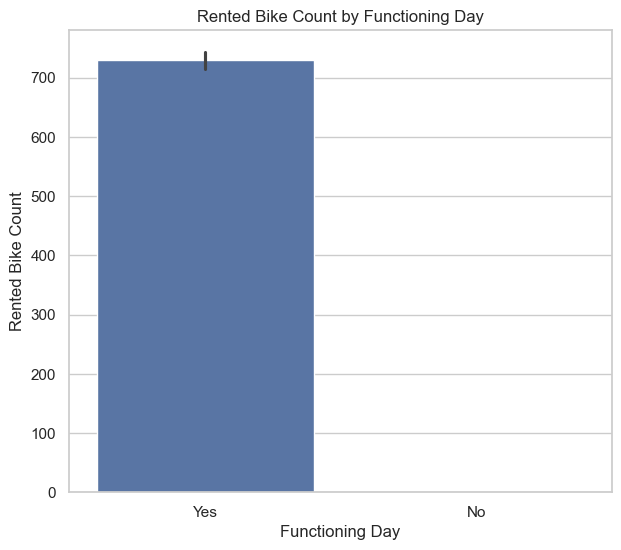

In [100]:
plt.figure(figsize=(7,6))
sns.barplot(y='Rented Bike Count', x='Functioning Day', data=df)
plt.title("Rented Bike Count by Functioning Day")
plt.ylabel("Rented Bike Count")

##### 1. Why did you pick the specific chart?


Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the avg rented bike demand over functioning day, I have used Bar Chart.


##### 2. What is/are the insight(s) found from the chart?


As expected, on non functioning day there is no demand (because the rentals bike service is not functioning, so no one is booking).


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


No, as the rentals bike service is not functioning on non functioning day, there is no demand.


#### Chart - 8 - Correlation Heatmap


In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr, annot = True, fmt='.2f')

##### 1. Why did you pick the specific chart?


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, I used correlation heatmap.


##### 2. What is/are the insight(s) found from the chart?


The temperature and dew point temperature features are highly correlated which my create difficulties in model interpretation after training, so we may need to drop one of them.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


No, we can use any one of the two features to predict future demand, we don't need both.


#### Chart - 9 - Line Plot - Average Rented Bike Count by Hour for each Seasons


In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Hour", y="Rented Bike Count", hue="Seasons", data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Rented Bike Count trend by Hour for each Seasons")

##### 1. Why did you pick the specific chart?


Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.

Thus, I have used the line chart to show the average rented bike count for different seasons over different hours of the day.


##### 2. What is/are the insight(s) found from the chart?


The Rentals Bike demand trend pattern is same for all the seasons only levels are different. Demand level in winter is lowest and highest in Summer


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, during the summer months when demand is highest, the company can increase the number of bikes available, hire more staff, and promote the service to attract more customers. Similarly, during the winter months when demand is lowest, the company can reduce its operations and allocate its resources to other areas of the business.

And daily pattern is same for all the seasons hence daily strategy (rush hour & non rush hour) is same all over the year.


#### Chart - 10 - Rented Bike Demand by Rainfall & Snowfall


In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sns.scatterplot(x='Rainfall(mm)', y='Rented Bike Count', data=df)
plt.title("Rented Bike Count by Rainfall(mm)")

plt.subplot(2,1,2)
sns.scatterplot(x='Snowfall (cm)', y='Rented Bike Count', data=df)
plt.title("Rented Bike Count by Snowfall (cm)")

##### 1. Why did you pick the specific chart?


A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Thus, I have used the scatter plot to depict the relationship between Rented Bike Count and Rainfall as well as Snowfall.


##### 2. What is/are the insight(s) found from the chart?


Most Rentals Bikes are rented mostly when there is 0 rainfall and snowfall. As Rainfall and snowfall increases demand decreases.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Although we can't control Rainfall or Snowfall but by understanding the demand trend over snowfall and rainfall, the company can adjust its operations to better meet customer needs attractiveness maybe by offer promotions or discounts.


#### Chart - 11 - Avg Rented Bike Count by Holiday


In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y='Rented Bike Count', x='Holiday', data=df)
plt.title("Rented Bike Count by Holiday")
plt.ylabel("Avg Rented Bike Count")

##### 1. Why did you pick the specific chart?


Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the total number of bookings with respect to holiday, I have used Bar Chart.


##### 2. What is/are the insight(s) found from the chart?


Non holidays have more demand compared to holidays maybe because alot of people uses rentals bike for going to offices/schools on non holidays.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, Companies can start campaigns to promote going out to have fun so that more people rent their bikes.


#### Chart - 12 - Temperature and Solar Radiation over time


In [ ]:
plt.figure(figsize=(12, 12))

# Plot temperature
plt.subplot(2, 1, 1)
sns.lineplot(x='Date', y='Temperature(°C)', hue='Year', data=df)
plt.ylabel('Temperature(°C)')
plt.title("Temperature(°C) by Date for each Year")

# Plot humidity
plt.subplot(2, 1, 2)
sns.lineplot(x='Date', y='Solar Radiation (MJ/m2)', hue='Year', data=df)
plt.ylabel('Solar Radiation (MJ/m2)')
plt.title("Solar Radiation (MJ/m2) by Date for each Year")

##### 1. Why did you pick the specific chart?


Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.


##### 2. What is/are the insight(s) found from the chart?


As expected temperature rises during summer months and lowers in winter months.

Similarly solar radiation is more in summer months copared to winter months, also huge fluctuations in solar radiation may be caused due to day-night cycle as there is no sunlight at night time.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


This may not be much helpful in creating positive business impact as this is natural phenomenon and we can't control it.


#### Chart - 13 - Avg Rented Bike Count by Wind speed (m/s)


In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Avg Rented Bike Count by Wind speed (m/s)")

In [ ]:
df['Wind speed (m/s)'].value_counts()

##### 1. Why did you pick the specific chart?


Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over wind speed).


##### 2. What is/are the insight(s) found from the chart?


Initially wind speed increases, the demand increases since flowing air creates better weather and less heat, although too high wind speed created storm and all so too high speed leads to decreases in demand.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


This may not be much helpful in creating positive business impact as this is natural phenomenon and we can't control it.


#### Chart - 14 - Avg Rented Bike Count by Humidity (%)


In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Humidity(%)', y='Rented Bike Count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Avg Rented Bike Count by Humidity(%)")

In [ ]:
# Unique value counts of Humidity
df['Humidity(%)'].value_counts()

##### 1. Why did you pick the specific chart?


Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over humidity).


##### 2. What is/are the insight(s) found from the chart?


After certain level as humidity increases demand decreases as too mush humidity may generally caused due to rain or snowfall as we already saw they leads to decrease in demand.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


This may not be much helpful in creating positive business impact as this is natural phenomenon and we can't control it.


#### Chart - 15 - Rented Bike Count trend by Visibility


In [ ]:
d = df.copy()
# Create bins of width 5 for the "Visibility (10m)" variable
bins = range(0, 2005, 5)

# Add a new column to the dataframe containing the bin labels
d['Visibility (10m) bin'] = pd.cut(d['Visibility (10m)'], bins=bins, include_lowest=True)
# Replacing bins with their mid values for better visualization axis labels
d['Visibility (10m) bin'] = d['Visibility (10m) bin'].apply(lambda x: x.mid)

plt.figure(figsize=(12,6))
sns.lineplot(x='Visibility (10m) bin', y='Rented Bike Count', data=d)
plt.xlabel('Visibility (10m)')
plt.ylabel('Avg Rented Bike Count')
plt.title("Rented Bike Count by Visibility (10m)")

##### 1. Why did you pick the specific chart?


Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over visibility).


##### 2. What is/are the insight(s) found from the chart?


As visibility increases rented bike demand increases which is obvious as people like to go out on clear day not on foggy day. Although after certain level no matter visibility increases demand remains consistent.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, although this is a natural process and we cannot control visibility but it clearly shows how it affects the demand, so what companies can do is that they can install lights (if not already done) on the bikes which may help little bit increase in visibility and those who is in need during these hours can rent it.


#### Chart - 16 - Column wise Histogram & Box Plot Univariate Analysis


In [ ]:
# Numeric Columns
num_cols = ['Temperature(°C)', 'Humidity(%)',
        'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
        'Solar Radiation (MJ/m2)', 'Rainfall(mm)',	'Snowfall (cm)']

n = len(num_cols)
plt.figure(figsize=(16, 48))

i = 1
for col in num_cols:
  plt.subplot(n, 2, i)
  sns.histplot(x=df[col], kde=True)
  plt.subplot(n, 2, i+1)
  sns.boxplot(x=df[col])
  i += 2

##### 1. Why did you pick the specific chart?


The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the distributions of different continuous features.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value of different continuous features.


##### 2. What is/are the insight(s) found from the chart?


Temperature, Dew Point Temperature and Humidity are approx normally distributed and rest are not.


##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


Yes, we can use this information to transform certain features so that we can train more robust and ccurate model wihch will help in demand prediction.


## **_5. Hypothesis Testing_**


### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


1.  Rented Bike Demand in **hot weather** is higher compared to demand in **cold weather**.
2.  Rented Bike Demand during **rush hour** (_7-9AM & 5-7PM_) and **non-rush hour** are different.
3.  Average Rented Bike Demand is different in different seasons.


### Hypothetical Statement - 1


Rented Bike Demand in **hot weather** is higher compared to demand in **cold weather**.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis: $H_o : μ_{cold} = μ_{hot}$

Alternate Hypothesis : $H_1 : μ_{cold} \neq μ_{hot}$

Test Type: Two-sample t-test


#### 2. Perform an appropriate statistical test.


In [44]:
# Split the data into the 'hot' and 'cold' temperature groups
hot_temps = df[df['Temperature(°C)'] >= 20]['Rented Bike Count']
cold_temps = df[df['Temperature(°C)'] < 20]['Rented Bike Count']

In [ ]:
print("Cold temperature Bike Demand Variance: ", np.var(cold_temps))
print("Hot temperature Bike Demand Variance: ", np.var(hot_temps))

In [ ]:
# Sample sizes for different temperature groups
print("Hot Temp sample size:", hot_temps.shape[0])
print("Cold Temp sample size:", cold_temps.shape[0])

In [ ]:
# Perform the t-test
t_stat, p_val = scipy.stats.ttest_ind(hot_temps, cold_temps, equal_var=False)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")

##### Which statistical test have you done to obtain P-Value?


I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts different in hot temperatures and cold temperaures.


##### Why did you choose the specific statistical test?


The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of _Rented Bike Count_ between the _hot_ and _cold_ temperature groups.

Also We know from previous charts that **Rented Bike Count** is **right skewed** with **large sample sizes** (i.e., $n_{hot}=2928$ & $n_{cold}=5832$) and we **don't know $\sigma_{p}$**.


### Hypothetical Statement - 2


Rented Bike Demand during **rush hour** (_7-9AM & 5-7PM_) is higher compared to **non-rush hour**.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis: $H_o : μ_{rush} = μ_{non-rush}$

Alternate Hypothesis : $H_1 : μ_{rush} \neq μ_{non-rush}$

Test Type: Two-sample t-test


#### 2. Perform an appropriate statistical test.


In [48]:
# Create subsets of the data based on hour
rush_hour = df[(df['Hour'] >= 7) & (df['Hour'] <= 9) | (df['Hour'] >= 17) & (df['Hour'] <= 19)]['Rented Bike Count']
non_rush_hour = df[~((df['Hour'] >= 7) & (df['Hour'] <= 9) | (df['Hour'] >= 17) & (df['Hour'] <= 19))]['Rented Bike Count']

In [ ]:
print("Rush Hour Bike Demand Variance: ", np.var(rush_hour))
print("Non-Rush Hour Bike Demand Variance: ", np.var(non_rush_hour))

In [ ]:
# Sample sizes for different hours
print("Rush Hour sample size:", rush_hour.shape[0])
print("Non-Rush Hour sample size:", non_rush_hour.shape[0])

In [ ]:
# Conduct a two-sample t-test to compare the mean bike rental demand during rush hour with the mean bike rental demand during non-rush hour times
t_stat, p_val = scipy.stats.ttest_ind(rush_hour, non_rush_hour, equal_var=False)

# Print the t-test results
# print('t-statistic:', t_stat)
# print('p-value:', p_val)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")

##### Which statistical test have you done to obtain P-Value?


I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts different in rush hours and non-rush hours.


##### Why did you choose the specific statistical test?


The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the rush hours and non-rush hours.

Also We know from previous charts that **Rented Bike Count** is **right skewed** with **large sample sizes** (i.e., $n_{rush}=2190$ & $n_{non-rush}=6570$) and we **don't know $\sigma_{p}$**.


### Hypothetical Statement - 3


Rented Bike Demand is different in different seasons with highest in summer and lowest in winter.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis: $H_o :$ **No significant difference** between rented bike counts for different seasons.

Alternate Hypothesis : $H_1 :$ **Significant difference** between rented bike counts for different seasons.

Test Type: One-way ANOVA test


#### 2. Perform an appropriate statistical test.


In [ ]:
# Sample sizes for different seasons
df.groupby('Seasons')['Rented Bike Count'].count()

In [ ]:
# Group the data by season and calculate the mean number of bike rentals for each season
season_means = df.groupby('Seasons')['Rented Bike Count'].mean()

# Conduct the ANOVA test
f_stat, p_value = scipy.stats.f_oneway(df.loc[df['Seasons']=='Spring', 'Rented Bike Count'],
                                  df.loc[df['Seasons']=='Summer', 'Rented Bike Count'],
                                  df.loc[df['Seasons']=='Autumn', 'Rented Bike Count'],
                                  df.loc[df['Seasons']=='Winter', 'Rented Bike Count'])

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p_val)
print()

# Conduct Tukey's HSD test for detailed difference b/w each groups
tukey_results = pairwise_tukeyhsd(df['Rented Bike Count'], df['Seasons'])

# Print the Tukey HSD test results
print(tukey_results)


##### Which statistical test have you done to obtain P-Value?


I have used One-way ANOVA test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts are significantly different in different seasons.


##### Why did you choose the specific statistical test?


The one-way ANOVA test is used to determine if there is a significant difference between the means of **more than two groups**, making it an appropriate test for comparing the mean number of Rented Bike Count between different seasons.

Also We know from previous charts that **Rented Bike Count** is **right skewed** with **large sample sizes** (i.e., $n_{autumn}=2184$, $n_{spring}=2208$, $n_{summer}=2208$ , $n_{winter}=2160$).


## **_6. Feature Engineering & Data Pre-processing_**


### 1. Handling Missing Values


In [ ]:
# Checking missing values 
df.isna().sum().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?


There are no missing values to handle in the given dataset.


### 2. Handling Outliers


In [55]:
# From chart 16 above, we know following columns have outliers
outlier_cols = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [56]:
# Upper & Lower Boundary using IQR method
def getOutlierBoundaryIQR(df, feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.75)+3*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Unique values and their counts for Rainfall(mm)
df['Rainfall(mm)'].value_counts()

We see that most of rows have value 0.0 and very few fave non-zero value. Which is understandable because we don't see rain everyday. Given the nature of data, it is unlikely that the non-zero values represent outliers. However value that is significantly higher can be treated as outlier.


In [ ]:
# Upper & Lower boundary for Rainfall(mm) using IQR method
ub, lb = getOutlierBoundaryIQR(df, 'Rainfall(mm)')
print(f"Boundary: [{ub}, {lb}]")
print("99th Percentile:", df['Rainfall(mm)'].quantile(0.99))

We see both boundries from IQR method are zero because of **majority of data being zero** and is **not normally distributed**. So we'll apply **99th quantile** for capping outlier.


In [59]:
# Applying outlier capping using 99th percentile
rainfall_99th = df['Rainfall(mm)'].quantile(0.99)
df['Rainfall(mm)_capped'] = df['Rainfall(mm)'].clip(upper=rainfall_99th)

In [ ]:
# Upper & Lower boundary using IQR method
ub, lb = getOutlierBoundaryIQR(df, 'Snowfall (cm)')
print(f"Boundary: [{ub}, {lb}]")
print("99th Percentile:", df['Snowfall (cm)'].quantile(0.99))

Similarly case for **Snowfall (cm)** as in **Rainfall(mm)**


In [61]:
# Applying outlier capping using 99th percentile
snowfall_99th = df['Snowfall (cm)'].quantile(0.99)
df['Snowfall(cm)_capped'] = df['Snowfall (cm)'].clip(upper=snowfall_99th)

In [ ]:
# Upper & Lower boundary using IQR method for Wind Speed (m/s)
ub, lb = getOutlierBoundaryIQR(df, 'Wind speed (m/s)')
print(f"Boundary: [{ub}, {lb}]")

In [63]:
# Applying outlier capping using IQR outer fence
ub, lb = getOutlierBoundaryIQR(df, 'Wind speed (m/s)')
df['Wind speed (m/s)_capped'] = df['Wind speed (m/s)'].clip(lower=lb, upper=ub)

In [ ]:
# Upper & Lower boundary using IQR method for Solar Radiation (MJ/m2)
ub, lb = getOutlierBoundaryIQR(df, 'Solar Radiation (MJ/m2)')
print(f"Boundary: [{ub}, {lb}]")

In [65]:
# Applying outlier capping using IQR outer fence
ub, lb = getOutlierBoundaryIQR(df, 'Solar Radiation (MJ/m2)')
df['Solar Radiation (MJ/m2)_capped'] = df['Solar Radiation (MJ/m2)'].clip(lower=lb, upper=ub)

##### What all outlier treatment techniques have you used and why did you use those techniques?


Four columns needed outlier treatments **Wind speed (m/s)**, **Solar Radiation (MJ/m2)**, **Rainfall(mm)** and **Snowfall (cm)**.

Among them columns **Rainfall(mm)** and **Snowfall (cm)** had most of its values 0, which is expected as rain or snow happens occsionaly, also people generally avoid going out when its raining or snowing. Hence few non-zero values may no necessarely represents outliers but too high value may be consideres as outlier. Also it is not normally distributed so I used **99th percentile** to cap the outliers in these two columns.

Rest two features **Wind speed (m/s)**, **Solar Radiation (MJ/m2)** was skewed hence used outer fence IQR method for capping outliers.

> 1.  Lower outer fence: Q1 – 3\*IQR
> 2.  Upper outer fence: Q3 + 3\*IQR


### 3. Categorical Encoding


In [ ]:
df.info()

In [ ]:
# Below categorical columns needs encoding using one hot encoding
d = df[['Seasons', 'Holiday','Functioning Day', 'Month', 'weekday']]
encoded_df = pd.get_dummies(d, drop_first=True)
df = pd.concat([df, encoded_df], axis=1)
df.head(2)

#### What all categorical encoding techniques have you used & why did you use those techniques?


I've used One Hot Encoding for **Seasons**, **Holiday**, **Functioning Day**, **Month**, **weekday** because the represents categorical values with no order also number of categories is not too high.

On the other hand, the **Hour** column is an ordinal categorical variable with 24 categories (one for each hour of the day). Since there is a natural order to these categories, label encoding would be more appropriate than one hot encoding. It was already in the format what Label Encoder will transform it to so left it as it is.


### 4. Feature Manipulation & Selection


#### 1. Feature Manipulation


In [68]:
# is_weekend feature can help capture any weekday/weekend patterns in the bike rental demand.
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

In [70]:
# Removing data of non functional days (non rented days)
df = df.drop(df[df['Functioning Day'] == 'No'].index)

# Since all values in Functioning Day Column is same, removing Functioning Day Column
df = df.drop(['Functioning Day'], axis = 1)

In [71]:
# # Lagged features: the number of rented bikes during the previous hour or day can be useful in capturing any trends or patterns in the data.
# d = pd.concat([df['Rented Bike Count'], df['Rented Bike Count'].shift(1), df['Rented Bike Count'].shift(2), df['Rented Bike Count'].shift(24)], axis=1)
# d.columns = ['rent_bike_count','lag1_rent_bike_count','lag2_rent_bike_count','lag24_rent_bike_count']
# d.corr()

In [72]:
# # Creating lagged feature prev_rented_bike_count (lag 1)
# df['prev_rented_bike_count'] = df['Rented Bike Count'].shift(1)

In [ ]:
df.head(3)

#### 2. Feature Selection


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# Features selected for modelling which includes:
# 1. Numerical (Continuous) Features
# 2. Encoded Categorical Features
filtered_features = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Rainfall(mm)_capped', 'Snowfall(cm)_capped', 'Wind speed (m/s)_capped',
       'Solar Radiation (MJ/m2)_capped', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'is_weekend'] #'prev_rented_bike_count'

df2 = df[filtered_features]
df2.head(2)

In [77]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF', ascending=False)

In [ ]:
calc_vif(df2.select_dtypes(include=['float','int']).drop('Rented Bike Count', axis=1))

In [79]:
# Dew Point Temperature is highly correlated, hence dropping Dew point Temperature
del df2['Dew point temperature(°C)']

In [ ]:
calc_vif(df2.select_dtypes(include=['float','int']).drop(['Rented Bike Count'], axis=1))

##### What all feature selection methods have you used and why?


Firstly I selected continuous numerical features including outlier treated features, then encoded versions of categorical features.

Then calculated VIF factor to detect any multicollinearity, which resulted in dropping Dew Point Temperature column which was highly correlated to Temperature. Rest of features was not very correlated as we already saw in EDA correlation heatmap above.

**VIF**: A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
**Correlation**: The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.


##### Which all features you found important and why?


Based on EDA and correlation heatmap in above section, we saw various features that has impact on target variable output. For example, we saw how **temperature** increase causes demand to increase, **rainfall** and **snowfall** decreases the demand, certain **seasons** have higher demand compared to other seasons, certain **hour** (rush hour) have more demand, **visibility** has posivitive effect on demand, too much **humidity** decreases demand etc.


### 5. Data Transformation


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?


**Temperature(°C)** and **Humidity(%)** is already approx normal.
Transformed **Wind speed (m/s)\_capped** to approx normal using _np.sqrt_


In [ ]:
# Transforming 'Rented Bike Count' to normal
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(x='Rented Bike Count', data=df2, kde=True)
plt.title("Rented Bike Count Distribution")

plt.subplot(1,3,2)
sns.histplot(np.log(df2['Rented Bike Count']), kde=True)
plt.title("Rented Bike Count (log) Distribution")

plt.subplot(1,3,3)
sns.histplot(np.sqrt(df2['Rented Bike Count']), kde=True)
plt.title("Rented Bike Count (sqrt) Distribution")

In [ ]:
# Transforming Rented Bike Count using np.sqrt
df2['Rented Bike Count'] = np.sqrt(df2['Rented Bike Count'])

In [ ]:
# Transforming Wind Speed using np.sqrt
df2['Wind speed (m/s)_capped'] = np.sqrt(df2['Wind speed (m/s)_capped'])

In [ ]:
# Wind Speed after transformation is approx normally distributed
sns.histplot(x='Wind speed (m/s)_capped', data=df2, kde=True)

### 6. Data Scaling


In [ ]:
df2.head()

In [ ]:
# Standardizing the required column
df2['Temperature(°C)'] = StandardScaler().fit_transform(df2['Temperature(°C)'].values.reshape(-1, 1))
df2['Humidity(%)'] = StandardScaler().fit_transform(df2['Humidity(%)'].values.reshape(-1, 1))

# Normalizing the required column
df2['Visibility (10m)'] = MinMaxScaler().fit_transform(df2['Visibility (10m)'].values.reshape(-1, 1))

In [ ]:
df2.head()

##### Which method have you used to scale you data and why?


When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution.
Use Normalization when your data does not follow Gaussian distribution.

So in my data, range of data values for **Temperature(°C)**, **Humidity(%)** and **Visibility (10m)** was large and rest was not. Also Temperature(°C) and Humidity(%) was approx normally distributed hence used **StandardScaler** whereas used **MinMaxScaler** for Visibility (10m).

**NOTE:-** _The '**Hour**' column also does not need scaling, as it represents discrete values from 0 to 23._


### 7. Dimesionality Reduction


In [ ]:
# Processed Dataset shape (rows, columns)
df2.shape

##### Do you think that dimensionality reduction is needed? Explain Why?


With 30 columns (independent features) and 8465 rows, and after doing all the feature engineering steps like removing multicolinearity, feature selection manupulations etc. I don't think I need dimensionality reduction here.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


Answer Here.


### 8. Data Splitting


In [ ]:
# Splitting data into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(df2.drop("Rented Bike Count", axis=1), df2["Rented Bike Count"], test_size = 0.25, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

##### What data splitting ratio have you used and why?


There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If we have a total of 100 instances, we should probably stick with cross validation as no single split is going to give you satisfactory variance in our estimates. If we have 100,000 instances, it doesn't really matter whether we choose an 80:20 split or a 90:10 split.

It is surprising to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 75:25 ratio.


### 9. Handling Imbalanced Dataset


In [ ]:
# Distribution of Rented Bike Count (target variable)
_ = sns.displot(x=df2['Rented Bike Count'], kde=True)

##### Do you think the dataset is imbalanced? Explain Why.


Looking at the distribution of traget variable (i.e., Rented Bike Count), values are not concentrated in a narrow range, and is normally distributed accross wide range of values. So the dataset is not imbalanced.


In [91]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)


Answer Here.


## **_7. ML Model Implementation_**


### ML Model - 1 - Linear Regression


In [97]:
# ML Model - 1 Implementation
linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(X_train, y_train)

# Predict on the model
train_preds = linear_reg.predict(X_train)
test_preds = linear_reg.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [100]:
# Dictionary to store different models accuracies
model_results = {}

In [101]:
# Storing model performance for comparision later
model_results['Linear Regression'] = [r2, mse, mae]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


In [ ]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(0, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')

plt.show()

I used Linear Regression algorithm to create the model. And the result is not so good.

For training data, I found R2 score of 0.673 & 46.1 and 5.2 as MSE and MAE respectively.

For testing data, I found R2 score of 0.672 & 45.5 and 5.1 as MSE and MAE respectively.

Next trying to improving the score by using hyperparameter tuning technique.


In [ ]:
# Checking Homoscedasticity
residuals = y_test - test_preds

plt.figure(figsize=(6,4))
_ = sns.lineplot(x=list(range(1, len(residuals)+1)), y=residuals)
plt.ylabel('Residuals')

It looks like variance is almost constant, hence fulfilling Homoscedasticity assumption of Linear Regression.


#### 2. Cross- Validation & Hyperparameter Tuning


In [104]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LinearRegression()
params = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm
grid_search.fit(X_train, y_train)
linear_reg_cv = grid_search.best_estimator_

# Predict on the model
train_preds = linear_reg_cv.predict(X_train)
test_preds = linear_reg_cv.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [107]:
# Storing model performance for comparision later
model_results['Linear Regression CV'] = [r2, mse, mae]

##### Which hyperparameter optimization technique have you used and why?


GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

If we don't have not very large hyperparameter space and training time for the model is not too long then we can go for this technique to find best hyperparameters.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridSearchCV method for hyperparameter optimization.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


For training data, I found R2 score of 0.673 & 46.1 and 5.2 as MSE and MAE respectively.

For testing data, I found R2 score of 0.672 & 45.5 and 5.1 as MSE and MAE respectively.

For Both training and testing data, **no improvement** is seen.


### ML Model - 2 - Ridge


In [108]:
# ML Model - 2 Implementation
ridge = Ridge(random_state=0)

# Fit the Algorithm
ridge.fit(X_train, y_train)

# Predict on the model
train_preds = ridge.predict(X_train)
test_preds = ridge.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [111]:
model_results['Ridge'] = [r2, mse, mae]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


In [ ]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(0, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')

plt.show()

I used Ridge Regression algorithm to create the model. And the result is not so good.

For training data, I found R2 score of 0.673 & 46.1 and 5.2 as MSE and MAE respectively.

For testing data, I found R2 score of 0.672 & 45.5 and 5.1 as MSE and MAE respectively.

Next trying to improving the score by using hyperparameter tuning technique.


In [ ]:
# Checking Homoscedasticity
residuals = y_test - test_preds

plt.figure(figsize=(6,4))
_ = sns.lineplot(x=list(range(1, len(residuals)+1)), y=residuals)
plt.ylabel('Residuals')

#### 2. Cross- Validation & Hyperparameter Tuning


In [114]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 50, 100]
}
ridge_cv = Ridge(random_state=0)
grid_search = GridSearchCV(ridge_cv, params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)

# Fit the Algorithm
grid_result = grid_search.fit(X_train, y_train)
ridge_cv = grid_search.best_estimator_

# Predict on the model
train_preds = ridge_cv.predict(X_train)
test_preds = ridge_cv.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [117]:
# Slightly Better Performance, updating performance of Ridge
model_results['RidgeCV'] = [r2, mse, mae]

##### Which hyperparameter optimization technique have you used and why?


GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

If we've don't have very large hyperparameter space and training time for the model is not too long then we can go for this technique to find best hyperparameters.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridSearchCV method for hyperparameter optimization.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


For training data, I found R2 score of 0.673 & 46.1 and 5.2 as MSE and MAE respectively.

For testing data, I found R2 score of 0.672 & 45.5 and 5.1 as MSE and MAE respectively.

For Both training and testing data, **no improvement** is seen.


#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.


**R2 (R-squared)**: R2 measures how much of the variance in the target variable is explained by the model. A high R2 score indicates that the model is able to capture a large portion of the variance in the target variable, and therefore is a good fit for the data. From a business perspective, a high R2 score can indicate that the model is accurately predicting the target variable, which can be valuable for decision-making purposes.

**MSE (Mean Squared Error)**: MSE measures the average squared difference between the predicted and actual values. A low MSE score indicates that the model's predictions are close to the actual values. From a business perspective, a low MSE score can indicate that the model is making accurate predictions, which can be valuable for decision-making purposes.

**MAE (Mean Absolute Error)**: MAE measures the average absolute difference between the predicted and actual values. Like MSE, a low MAE score indicates that the model's predictions are close to the actual values. However, MAE is less sensitive to outliers than MSE. From a business perspective, a low MAE score can indicate that the model is making accurate predictions across a wide range of values, which can be valuable for decision-making purposes.

Overall, these evaluation metrics can help a business to assess the performance of a machine learning model and its potential impact on business outcomes. By selecting the appropriate metrics and optimizing the model accordingly, businesses can build models that are well-suited to their specific needs and goals.


### ML Model - 3 - Decision Tree Regressor


In [118]:
# ML Model - 3 Implementation
dtree = DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100, random_state=1)

# Fit the Algorithm
dtree.fit(X_train, y_train)

# Predict on the model
train_preds = dtree.predict(X_train)
test_preds = dtree.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [121]:
model_results['Decision Tree'] = [r2, mse, mae]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


In [ ]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(8, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')

plt.show()

I used Decision Tree Regressor algorithm to create the model. And the result is better than previous two linear models.

For training data, I found R2 score of 0.824 & 24.8 and 3.6 as MSE and MAE respectively.

For testing data, I found R2 score of 0.776 & 31.0 and 4.0 as MSE and MAE respectively.

Next trying to improving the score by using hyperparameter tuning technique.


#### 2. Cross- Validation & Hyperparameter Tuning


In [123]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'max_depth': np.arange(1, 10),
          'min_samples_leaf': [1, 2, 4, 8, 16]
}
dtree_cv = DecisionTreeRegressor(random_state=1)
grid_search = GridSearchCV(dtree_cv, params, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm
grid_result = grid_search.fit(X_train, y_train)
dtree_cv = grid_search.best_estimator_

# Predict on the model
train_preds = dtree_cv.predict(X_train)
test_preds = dtree_cv.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [126]:
model_results['Decision Tree CV'] = [r2, mse, mae]

In [ ]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(8, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')

plt.show()

##### Which hyperparameter optimization technique have you used and why?


GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

If we don't have very large hyperparameter space and training time for the model is not too long then we can go for this technique to find best hyperparameters.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridSearchCV method for hyperparameter optimization.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


For training data, I found R2 score of 0.905 & 13.4 and 2.5 as MSE and MAE respectively.

For testing data, I found R2 score of 0.838 & 22.3 and 3.1 as MSE and MAE respectively.

For Both training and testing data, **quite improvement** is seen.


### ML Model - 4 - Random Forest Regressor


In [128]:
# ML Model - 3 Implementation
rf_model = RandomForestRegressor(random_state=1)

# Fit the Algorithm
rf_model.fit(X_train, y_train)

# Predict on the model
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [131]:
model_results['Random Forest'] = [r2, mse, mae]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


In [ ]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(8, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')

plt.show()

I used Random Forest Regressor algorithm to create the model. And the result is better than previous decision tree model.

For training data, I found R2 score of 0.991 & 1.2 and 0.7 as MSE and MAE respectively.

For testing data, I found R2 score of 0.920 & 11.0 and 2.0 as MSE and MAE respectively.

Next trying to improving the score by using hyperparameter tuning technique.


#### 2. Cross- Validation & Hyperparameter Tuning


In [133]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'n_estimators': [50, 100, 150],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]
}
rf_model_cv = RandomForestRegressor(random_state=1)
# grid_search = GridSearchCV(rf_model_cv, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rand_search = RandomizedSearchCV(rf_model_cv, param_distributions=params, n_iter=50, cv=5, n_jobs=-1, random_state=1)

# Fit the Algorithm
rand_result = rand_search.fit(X_train, y_train)
rf_model_cv = rand_search.best_estimator_

# Predict on the model
train_preds = rf_model_cv.predict(X_train)
test_preds = rf_model_cv.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [136]:
model_results['Random Forest CV'] = [r2, mse, mae]

In [ ]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(8, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')

plt.show()

Which hyperparameter optimization technique have you used and why?


RandomSearchCV which uses the Tandom Search technique for finding the optimal hyperparameters to increase the model performance.

If we've very large hyperparameter space and training time for the model is quite long then we can go for this technique to find best hyperparameters.

In RandomSearchCV, along with Random Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used RandomSearchCV method for hyperparameter optimization.


Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


For training data, I found R2 score of 0.987 & 1.8 and 0.9 as MSE and MAE respectively.

For testing data, I found R2 score of 0.918 & 11.2 and 2.0 as MSE and MAE respectively.

For Both training and testing data, **performance has decreased** slightly.


### ML Model - 5 - XGBoost Regressor


In [138]:
# ML Model - 3 Implementation
xgb_model = XGBRegressor(random_state=1)

# Fit the Algorithm
xgb_model.fit(X_train, y_train)

# Predict on the model
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [141]:
model_results['XGBoost'] = [r2, mse, mae]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


In [ ]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(8, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')

plt.show()

I used XGBoost Regressor algorithm to create the model. And the result is better than previous Random Forest model for test data.

For training data, I found R2 score of 0.989 & 1.4 and 0.8 as MSE and MAE respectively.

For testing data, I found R2 score of 0.932 & 9.4 and 1.9 as MSE and MAE respectively.

Next trying to improving the score by using hyperparameter tuning technique.


#### 2. Cross- Validation & Hyperparameter Tuning


In [143]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 6, 10, 12, 15],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],
    'n_estimators': [50, 100, 200, 300, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb_model_cv = XGBRegressor(random_state=1)
rand_search = RandomizedSearchCV(xgb_model_cv, param_distributions=params, n_iter=50, cv=5, n_jobs=-1, random_state=1)

# Fit the Algorithm
rand_result = rand_search.fit(X_train, y_train)
xgb_model_cv = rand_search.best_estimator_

# Predict on the model
train_preds = xgb_model_cv.predict(X_train)
test_preds = xgb_model_cv.predict(X_test)

In [ ]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

In [ ]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

In [146]:
model_results['XGBoost CV'] = [r2, mse, mae]

In [ ]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(8, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')

plt.show()

Which hyperparameter optimization technique have you used and why?


RandomSearchCV which uses the Tandom Search technique for finding the optimal hyperparameters to increase the model performance.

If we've very large hyperparameter space and training time for the model is quite long then we can go for this technique to find best hyperparameters.

In RandomSearchCV, along with Random Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used RandomSearchCV method for hyperparameter optimization.


Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


For training data, I found R2 score of 0.999 & 0.0 and 0.1 as MSE and MAE respectively.

For testing data, I found R2 score of 0.939 & 8.3 and 1.7 as MSE and MAE respectively.

For Both training and testing data, **slight improvement** is seen.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?


I've used three evaluation metrics R-squared ($R^2$), Mean Squared Error ($MSE$) and Mean Absolute Error ($MAE$).

- $R^2$ measures how much of the variance in the target variable is explained by the model. A high $R^2$ score indicates that the model is able to capture a large portion of the variance in the target variable, and therefore is a good fit for the data. From a business perspective, a high $R^2$ score can indicate that the model is accurately predicting the target variable, which can be valuable for decision-making purposes.

- $MSE$ measures the average squared difference between the predicted and actual values. A low $MSE$ score indicates that the model's predictions are close to the actual values. From a business perspective, a low $MSE$ score can indicate that the model is making accurate predictions, which can be valuable for decision-making purposes.

- $MAE$ measures the average absolute difference between the predicted and actual values. Like MSE, a low $MAE$ score indicates that the model's predictions are close to the actual values. However, $MAE$ is less sensitive to outliers than $MSE$. From a business perspective, a low $MAE$ score can indicate that the model is making accurate predictions across a wide range of values, which can be valuable for decision-making purposes.

Hence, these evaluation metrics can help a business to assess the performance of a machine learning model and its potential impact on business outcomes.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?


The XGBoost model (CV: which is hyperparameter optimized) seems to be the best choice for this dataset as it has the highest $R^2$ score, the lowest $MSE$, and the lowest $MAE$. As shown in figure table:


In [ ]:
Model_com_df = pd.DataFrame(model_results).T
Model_com_df.columns = ["R2", 'MSE', 'MAE']
Model_com_df = Model_com_df.sort_values(by='R2',ascending=False)
Model_com_df.style.format('{:.3f}').background_gradient(cmap='RdYlGn')

The above metrics scores are on test data.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?


In [ ]:
# Create a SHAP Explainer object
explainer = shap.Explainer(xgb_model_cv)

# Calculate SHAP values for all features
shap_values = explainer(X_test)

# Plot the feature importance using a bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

A SHAP summary plot shows the overall importance of each feature in a machine learning model. It can be used to identify the most important features that are driving the model's predictions and gain insights into how those features are influencing the predictions.

We can see that **Hour** and **Temperature** are the two most important feature to predict rental bike demand, then followed by **Humidity**, **Season_Winter**, **Solar Radiation**, **Rainfall** etc.


In [ ]:
shap.summary_plot(shap_values, X_test)

Above plot is another way to visualise SHAP values. this plot not only shows which feature is most important but also the positive-negative impact of different values of features. For example, we can see that high values of both **Hour** and **Temperature** has _positive impact_ on model output, whereas high values of both **Humidity** and **rainfall** has _negative impact_ on model output.


## **_8._** **_Future Work (Optional)_**


### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [151]:
# Save the model to a pickle file
with open("xgb_model.pkl", "wb") as f:
  pickle.dump(xgb_model_cv, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the model from the pickle file
with open("xgb_model.pkl", "rb") as f:
    loaded_xgb_model = pickle.load(f)

new_test_preds = loaded_xgb_model.predict(X_test)

# Sanity Check
mse = mean_squared_error(y_test, new_test_preds)
mae = mean_absolute_error(y_test, new_test_preds)
r2 = r2_score(y_test, new_test_preds)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

### **_Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!_**
